# 2021/4/27 最適化 - 線形計画

###### 線形計画法について、簡単な事例で練習してみる

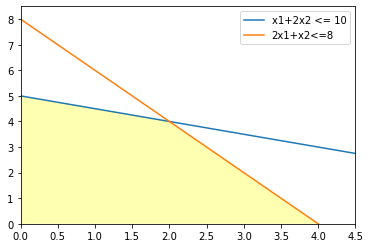

In [1]:
#以下のグラフにおいて最適化計算を行う
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 5, 100)

#直線を定義
y1 = 5 - 0.5*x
y2 =  8 - 2*x

#0の配列
y3 = np.zeros_like(x)

#y1とy2の内小さいほう
y4 = np.minimum(y1, y2)

plt.figure()
plt.plot(x, y1, label="x1+2x2 <= 10")
plt.plot(x, y2, label="2x1+x2<=8")

#中間を塗りつぶし
plt.fill_between(x, y3, y4, where=y4>y3, facecolor='yellow', alpha=0.3)

#可視化
plt.ylim(0, 8.5)
plt.xlim(0, 4.5)
plt.legend(loc=0)

plt.show()

In [2]:
#最適化計算を実行
import pulp

#目的関数を最大化に設定
problem = pulp.LpProblem('Curry_Oyako', pulp.LpMaximize)

#変数の0-10の整数として定義
Curry = pulp.LpVariable('Curry', 0, 10, 'Integer') 
Oyako = pulp.LpVariable('Oyako', 0, 10, 'Integer') 

#目的関数の定義
problem += 2*Curry + 3*Oyako

#制約条件の定義
problem += Curry + 2*Oyako <= 10
problem += 2*Curry + Oyako <= 8

#解く
status = problem.solve()

#statusの確認
print(pulp.LpStatus[status])

#結果表示
print("Result")
print("Curry:",Curry.value())
print("Oyako:",Oyako.value())

Optimal
Result
Curry: 2.0
Oyako: 4.0
